In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
X_df = pd.read_csv('data/X_train.csv')
Y_df = pd.read_csv('data/Y_train.csv')

## Split train-val

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_df, Y_df, test_size=0.2, random_state=42)

print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)

(24000, 23) (24000, 2) (6000, 23) (6000, 2)


In [4]:
# Học từ tập Train, k học từ tập Val
X_df, Y_df = X_train, Y_train

In [5]:
X_df.head()

,id,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,...,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
21753,21754,BMW,518,mechanical,green,494000,1993,gasoline,gasoline,1.8,...,False,False,False,False,False,False,False,False,False,True
251,252,Renault,Laguna,mechanical,blue,176000,1999,diesel,diesel,1.9,...,False,True,False,False,False,False,False,False,False,True
22941,22942,Citroen,C5,mechanical,blue,320000,2004,diesel,diesel,2.0,...,False,False,False,False,False,False,False,False,True,True
618,619,Mercedes-Benz,E220,mechanical,silver,440000,2005,diesel,diesel,2.2,...,False,True,True,True,False,True,True,True,True,True
17090,17091,Chrysler,Voyager,mechanical,black,370,2003,diesel,diesel,2.5,...,False,True,False,False,False,False,False,False,False,True


In [6]:
Y_df.head()

,id,price
21753,21754,790.0
251,252,2400.0
22941,22942,4600.0
618,619,8000.0
17090,17091,5850.0


## Count NaN values

In [ ]:
X_df.isnull().sum()

## Delete null rows

In [7]:
Y_df = Y_df.drop(X_df[X_df.engineCapacity.isnull()].index)
X_df = X_df.drop(X_df[X_df.engineCapacity.isnull()].index)
print(X_df.shape, Y_df.shape)

(23993, 23) (23993, 2)


## Count unique values 

In [ ]:
for c in X_df.columns:
    print(c, len(X_df[str(c)].unique()))

# Data visualization
## Numerical data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x168A0590>,
      dtype=object)

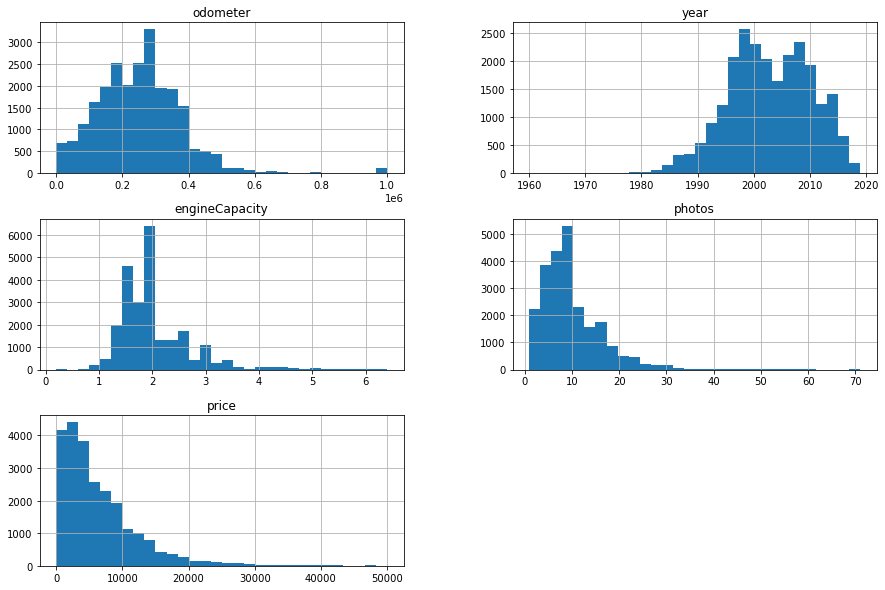

In [8]:
# gop X_df với trường price để dễ vẽ đồ thị
X_df = pd.concat([X_df, Y_df.price], axis=1)

# Lọc biến có dạng Numerical ra để xem xét
X_num_feature = X_df.select_dtypes(include=[np.number])
X_num_feature.pop('id')

# Vẽ đồ thị đơn giản dạng tần số (histogram)
X_num_feature.hist(figsize=(15, 10), bins=30, xlabelsize=10, ylabelsize=10)

### Price data

In [9]:
# Các thông số cơ bản
X_df['price'].describe()

count    23993.000000
mean      6568.709322
std       6014.606774
min          1.000000
25%       2300.000000
50%       4900.000000
75%       8950.000000
max      49999.000000
Name: price, dtype: float64

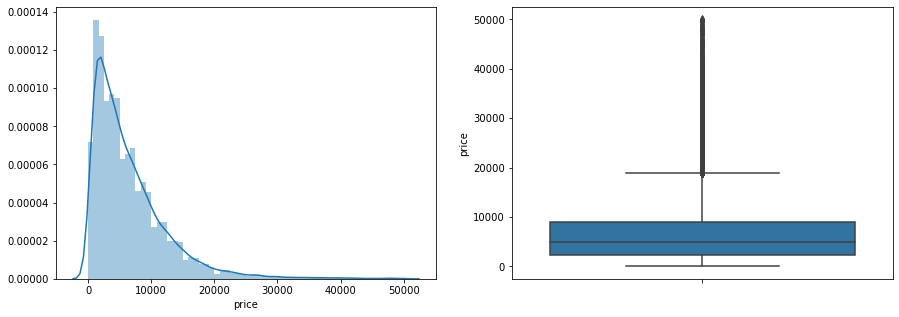

In [10]:
# Vẽ đồ thị hộp và cột
Pricefig, axs = plt.subplots(ncols = 2, figsize=(15, 5))
sns.distplot(X_df['price'], kde=True, bins=60,  ax=axs[0])
sns.boxplot( y=X_df['price'], orient='v' ,ax=axs[1])

Theo thống kê có giá max là 50000, min là 1 và trung bình là 6596.436659. \
Độ lệch chuẩn là 6092.176, khá lớn nên có thể suy ra biến price phân tán nhiều giá trị trong khoảng (0,50000).\
Dựa theo biểu đồ thấy biến này thuộc dạng skew right, nghiêng về khoảng giá trị là (0, 20000).

## Boolean data

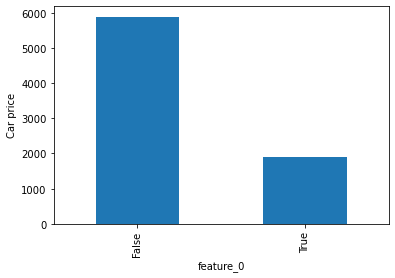

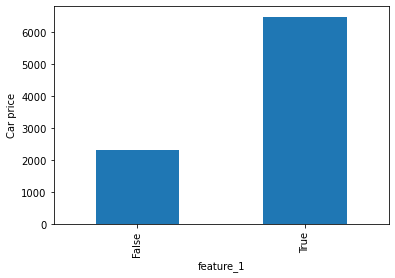

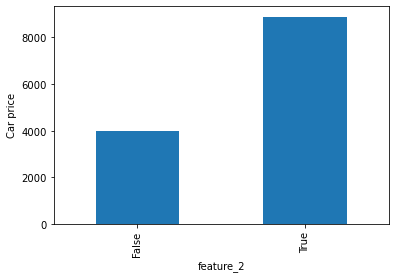

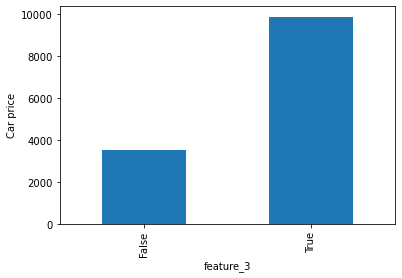

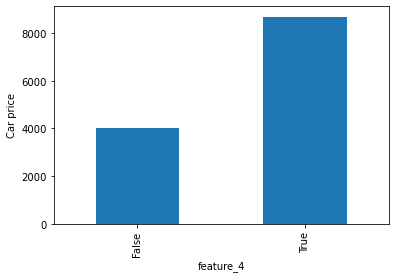

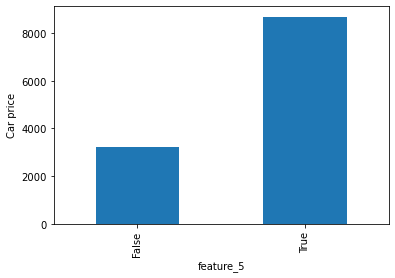

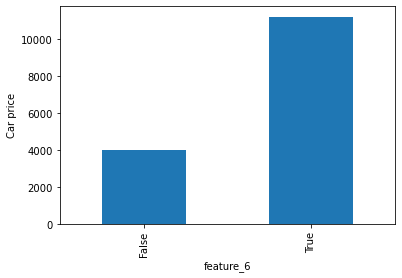

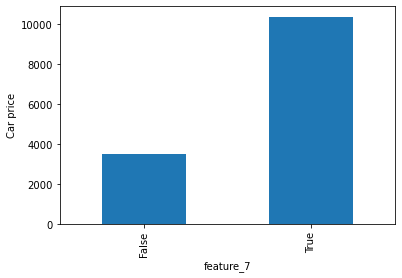

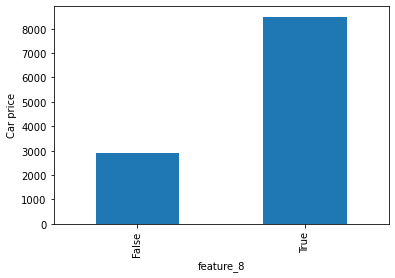

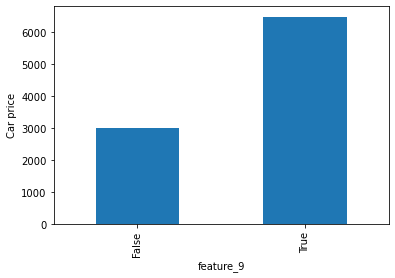

In [11]:
X_bool_feature = X_df.select_dtypes(include=[np.bool_])
for feature in X_bool_feature:
    data=X_df.copy()
    data.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Car price')
    plt.show()

Có thể thấy các cặp đồ thì giống nhau là:
1. feature_8 và feature_5
2. feature_4 và feature_2
2. feature_3 và feature_7

## Categorical data

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

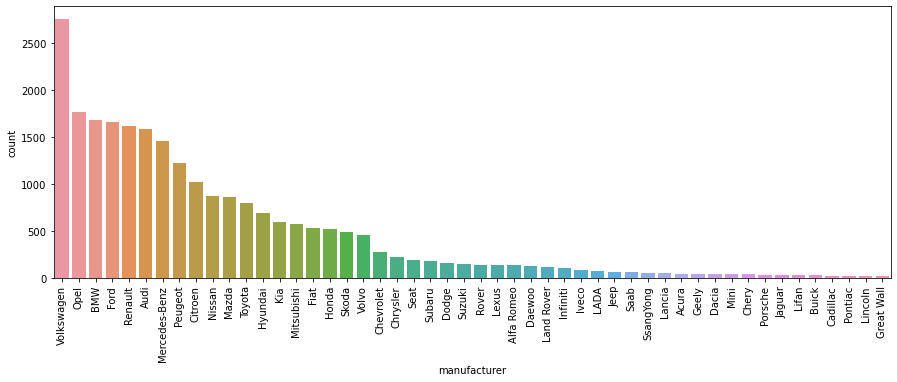

In [12]:
# Hãng xe và kiểu xe
plt.figure(figsize=(15, 5))
brand_chart = sns.countplot(data=X_df, order = X_df['manufacturer'].value_counts().index, x='manufacturer')
plt.xticks(rotation=90)

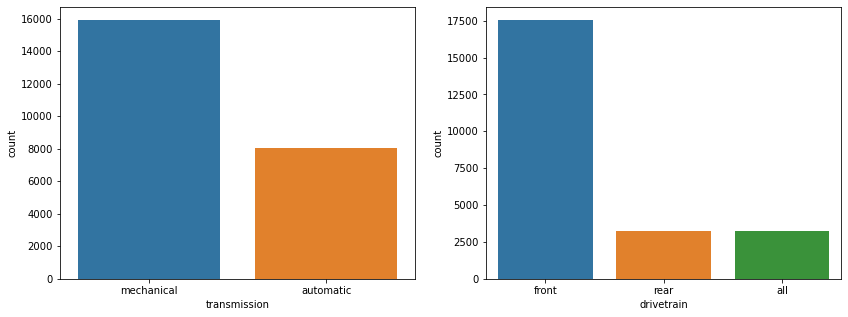

In [13]:
# Transmission và drivetrain
fig, axs = plt.subplots(ncols = 2, figsize=(14, 5))
sns.countplot(data=X_df, order = X_df['transmission'].value_counts().index, x='transmission', ax=axs[0])
sns.countplot(data=X_df, order = X_df['drivetrain'].value_counts().index, x='drivetrain', ax=axs[1])

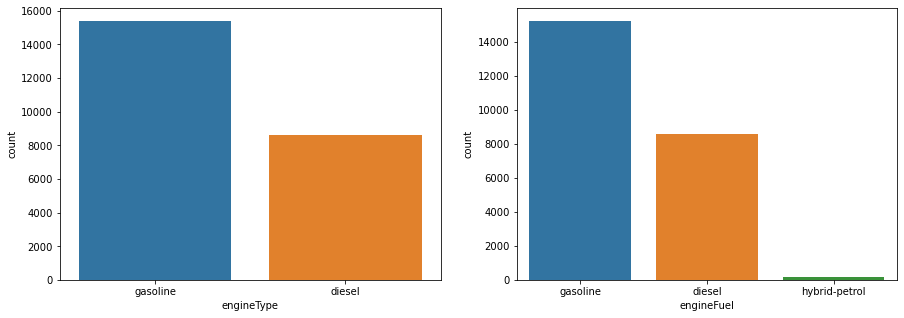

In [14]:
# engineFuel và engineType
fig, axs = plt.subplots(ncols = 2, figsize=(15, 5))
sns.countplot(data=X_df, order = X_df['engineType'].value_counts().index, x='engineType', ax=axs[0])
sns.countplot(data=X_df, order = X_df['engineFuel'].value_counts().index, x='engineFuel', ax=axs[1])

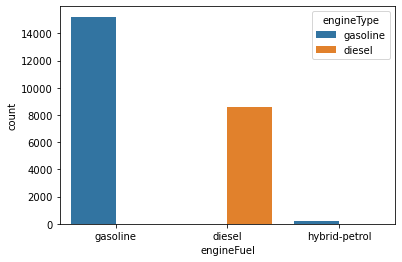

In [15]:
# Đồ thị quan hệ giữa engineFuel và engineType
sns.countplot(x='engineFuel', hue="engineType", data=X_df)

Có thể thấy nếu engineFuel là gasoline thì engineType là gasoline. \
Nếu engineFuel là diesel thì engineType là diesel. \
Nếu engineFuel là hybrid-petrol thì engineType là gasoline. \
Nếu engineFuel là hybrid-diesel thì engineType là gasoline. \

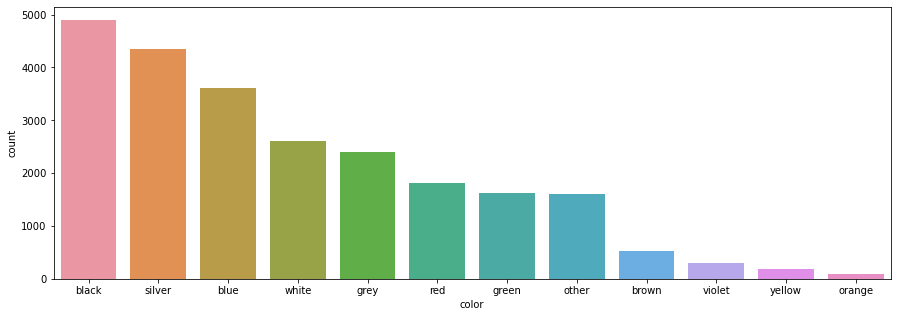

In [16]:
# Color
plt.figure(figsize=(15, 5))
sns.countplot(data=X_df, order = X_df['color'].value_counts().index, x='color')

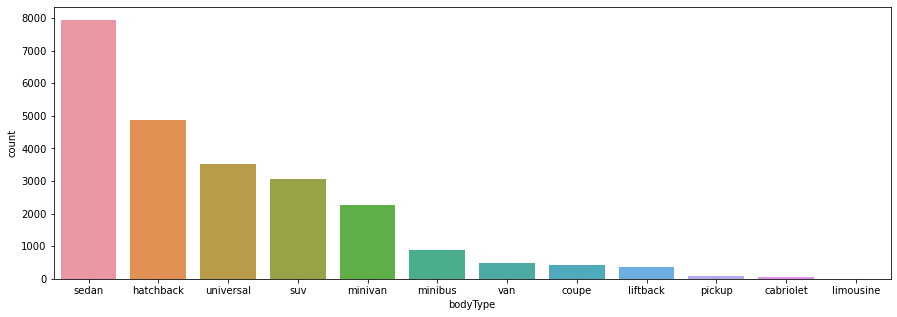

In [17]:
# Body type
plt.figure(figsize=(15, 5))
sns.countplot(data=X_df, order = X_df['bodyType'].value_counts().index, x='bodyType')

# Data manipulation

## Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

for c in X_df.columns:
    if len(X_df[str(c)].unique()) == 2:
        X_df[str(c)] = LabelEncoder().fit_transform(X_df[str(c)])

In [ ]:
X_df.head()

## One hot encoding

In [ ]:
columns = X_df.columns
for c in columns:
    c = str(c)
    len_unique = len(X_df[c].unique())
    if len_unique > 2 and len_unique < 10:
        one_hot = pd.get_dummies(X_df[c], drop_first=True)
        X_df = pd.concat([X_df, one_hot], axis=1)
        X_df.drop(c, axis=1, inplace=True)

In [ ]:
X_df.head()

In [ ]:
X_df.shape

## Drop same features

In [ ]:
sames = []

columns = X_df.columns
n = len(columns)
for i in range(n):
    for j in range(i + 1, n):
        if sum(X_df.iloc[:, i] == X_df.iloc[:, j])== X_df.shape[0]:
                sames.append((i, j))
                
sames

In [ ]:
column_numbers = list(range(X_df.shape[1]))
for s in sames:
    column_numbers.remove(s[0])
X_df = X_df.iloc[:, column_numbers]

## Check Duplicated Rows

In [ ]:
sum(X_df.duplicated(subset = 'id')) == 0

## Rescaling Features

In [ ]:
# chọn Odometer dùng Gauss Rescaling
# Year, engineCapacity, photos dùng Min max Rescaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()

num_vars = ['year', 'engineCapacity', 'photos']
X_df[num_vars] = scaler.fit_transform(X_df[num_vars])

scaler = StandardScaler()
num_vars = ['odometer']
X_df[num_vars] = scaler.fit_transform(X_df[num_vars])

In [ ]:
# gop X_df, Y_df
df = pd.concat([X_df, Y_df.price], axis=1)
df.head()

## Target encoding

In [ ]:
# gop X_df, Y_df
X_df = pd.concat([X_df, Y_df.price], axis=1)

In [ ]:
# Manufacturer
manufacturer_avg_price = X_df.groupby('manufacturer')['price'].mean()
X_df['manufacturer'] = X_df['manufacturer'].map(manufacturer_avg_price)

# Model
model_avg_price = X_df.groupby('model')['price'].mean()
X_df['model'] = X_df['model'].map(model_avg_price)

# Color
color_avg_price = X_df.groupby('color')['price'].mean()
X_df['color'] = X_df['color'].map(color_avg_price)

# BodyType
bodyType_avg_price = X_df.groupby('bodyType')['price'].mean()
X_df['bodyType'] = X_df['bodyType'].map(bodyType_avg_price)

X_df.head()